In [347]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy              as np
import plotly.express       as px
import pydotplus         as pdp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [348]:
import chardet

with open('data.csv', 'rb') as f:
    result = chardet.detect(f.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [349]:
# link https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download

df = pd.read_csv('data.csv', encoding= 'Windows-1252')
df.shape

(9994, 21)

In [350]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### **DATA QUALITY**

#### **Missing values**

In [351]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### **Data Types**

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [353]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format= '%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format= '%m/%d/%Y')
df['Ship Days'] = df['Ship Date'] - df['Order Date']
df['Ship Days'] = df['Ship Days'].dt.days

#### **Unique Values**

In [354]:
df_ = pd.DataFrame({'columns': df.columns, 'n_unique': [df[col].nunique() for col in df.columns]})
df_ = df_.sort_values(by='n_unique', ascending=True)
df_

,columns,n_unique
8,Country,1
7,Segment,3
14,Category,3
4,Ship Mode,4
12,Region,4
21,Ship Days,8
19,Discount,12
18,Quantity,14
15,Sub-Category,17
10,State,49


In [355]:
cols = ['Row ID', 'Order ID', 'Order Date', 'Ship Date','Customer ID', 'Customer Name','City',
       'Postal Code', 'Product ID','Product Name']
df_ = pd.DataFrame({'column': df.columns, 'n_unique': [df[col].nunique() for col in df.columns]}).sort_values(by='n_unique', ascending= True)

fig = px.scatter(
    df_,
    x='n_unique',
    y='column',
    orientation='h',
    title='Unique Value Count',
)

fig.update_traces(
    marker=dict(
        size=10,
        color='LightSeaGreen',
        opacity=0.8
    )
)

fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Column',
    title_font=dict(size=16, weight='bold'),
    height=500,
    
    showlegend=False
)

fig.update_xaxes(
    title_font=dict(size=10),
    tickfont=dict(size=12)
)

fig.update_yaxes(
    title_font=dict(size=10),
    tickfont=dict(size=12)
)


fig.show()


#### **Outliers**

In [356]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

n = df.shape[0]
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    below_lower = df[df[col] < lower]
    above_upper = df[df[col] > upper]
    print(f'\n======= {col} =======')
    print(f'Lower Outlier: {below_lower.shape[0]} '
          f'({below_lower.shape[0] / n * 100:.2f}%)')
    print(f'Upper Outlier: {above_upper.shape[0]} '
          f'({above_upper.shape[0] / n * 100:.2f}%)')


======= Sales =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 1167 (11.68%)

======= Quantity =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 170 (1.70%)

======= Discount =======
Lower Outlier: 0 (0.00%)
Upper Outlier: 856 (8.57%)

======= Profit =======
Lower Outlier: 604 (6.04%)
Upper Outlier: 1277 (12.78%)


Since a relatively high proportion of outliers is observed (ranging from 1% to 12%), these values are likely to reflect genuine purchasing behaviors rather than mere data errors or anomalies. Therefore, recorded outliers are retained and treated as informative signals, particularly for sales and profit analysis.

#### **Duplicated Rows**

In [357]:
print(f'Duplicated rows: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'Duplicated rows eliminated')

Duplicated rows: 0
Duplicated rows eliminated


#### **Drop and Rename Columns**

In [358]:
df.drop(['Row ID', 'Country', 'Postal Code'], axis= 1, inplace=True)
df.shape

(9994, 19)

In [359]:
df.columns = ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name','segment', 
              'city', 'state', 'region', 'product_id', 'category', 'sub_category', 'product_name', 
              'sales', 'quantity', 'discount', 'profit', 'ship_days']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   ship_mode      9994 non-null   object        
 4   customer_id    9994 non-null   object        
 5   customer_name  9994 non-null   object        
 6   segment        9994 non-null   object        
 7   city           9994 non-null   object        
 8   state          9994 non-null   object        
 9   region         9994 non-null   object        
 10  product_id     9994 non-null   object        
 11  category       9994 non-null   object        
 12  sub_category   9994 non-null   object        
 13  product_name   9994 non-null   object        
 14  sales          9994 non-null   float64       
 15  quantity       9994 n

### **EXPLORATORY DATA ANALYSIS (EDA)**

#### **Distribution of Numerical Features**

In [360]:
num_cols = ['sales', 'quantity', 'discount', 'profit']

In [361]:
cols = ['sales', 'quantity', 'discount', 'profit']

fig = make_subplots(
    rows=len(cols),
    cols=2,
    subplot_titles=[
        f"{col.capitalize()}" if j == 0 else f"{col.capitalize()}"
        for col in cols for j in range(2)
    ],
    column_widths=[0.65, 0.35],
    vertical_spacing=0.08
)

for i, col in enumerate(cols, start=1):
    x = df[col].dropna()

    mean = x.mean()
    median = x.median()

    # Histogram
    fig.add_trace(
        go.Histogram(
            x=x,
            nbinsx=30,
            opacity=0.8,
            name=col,
            showlegend=False,
            marker= dict(color='LightSeaGreen')
        ),
        row=i, col=1
    )

    # Mean & Median lines
    fig.add_vline(x=mean, line_dash="dash", line_color="red", row=i, col=1)
    fig.add_vline(x=median, line_dash="solid", line_color="darkred", row=i, col=1)

    # Boxplot (horizontal)
    fig.add_trace(
        go.Box(
            x=x,
            orientation='h',
            boxmean=True,
            showlegend=False,
            marker= dict(color='LightSeaGreen')
        ),
        row=i, col=2
    )

fig.update_layout(
    height=300 * len(cols),
    width=1000,
    title_text="Numerical Column Distribution",
    title_x=0.5,
    bargap=0.05,
    title_font=dict(size=16, weight='bold')
)

fig.update_xaxes(title_font=dict(size=10), tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=10), tickfont=dict(size=12))

fig.show()


##### **Skewness**

In [362]:
df_ = df[cols].skew().reset_index()
df_.columns = ['variable', 'skewness']
df_


,variable,skewness
0,sales,12.972752
1,quantity,1.278545
2,discount,1.684295
3,profit,7.561432


The numerical variables exhibit significant right skewness, particularly sales and profit. This indicates the presence of a small number of orders with exceptionally high values, potentially driven by specific products or sub-categories.

#### **Distribution of Categorical Features**

In [363]:

cols = ['state', 'sub_category']

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=['State','Sub-Category']
)

for i, col in enumerate(cols, start=1):
    vc = df[col].value_counts().sort_values()

    fig.add_trace(
        go.Bar(
            x=vc.values,
            y=vc.index,
            orientation='h',
            marker_color='LightSeaGreen',
        ),
        row=1,
        col=i
    )

fig.update_layout(
    title=dict(
        text='Value Count',
        x=0.5,
        font=dict(size=16, weight='bold')
    ),
    height=600,
    width=1000,
    showlegend=False,
)


fig.update_xaxes(title_font=dict(size=10), tickfont=dict(size=12), griddash='solid')
fig.update_yaxes(title_font=dict(size=10), tickfont=dict(size=12), griddash='solid')

fig.show()


In [364]:
cols = ['ship_mode', 'segment', 'region', 'category', 'ship_days']

fig = make_subplots(
    rows=len(cols),
    cols=2,
    column_widths=[0.65, 0.35],
    specs=[[{"type": "xy"}, {"type": "domain"}] for _ in cols],
    subplot_titles=['Ship Mode', 'Ship Mode', 'Segment', 'Segment', 'Region', 'Region', 'Category', 'Category', 'Ship Days', 'Ship Days'],
    vertical_spacing=0.08
)

for i, col in enumerate(cols, start=1):
    vc = df[col].value_counts()
    pct = vc / vc.sum() * 100

    colors = sns.color_palette("colorblind", n_colors=len(vc)).as_hex()

    # LEFT: Bar
    fig.add_trace(
        go.Bar(
            x=vc.index,
            y=vc.values,
            marker=dict(color=colors),
            hovertemplate=(
                f"<b>{col}</b><br>" +
                "Value: %{x}<br>" +
                "Count: %{y}<extra></extra>"
            )
        ),
        row=i,
        col=1
    )

    # RIGHT: Pie (dùng lại đúng colors đó)
    fig.add_trace(
        go.Pie(
            labels=vc.index,
            values=pct.values,
            hole=0.4,
            marker=dict(colors=colors),
            textinfo='percent',
            hovertemplate=(
                f"<b>{col}</b><br>" +
                "Value: %{label}<br>" +
                "Percent: %{value:.1f}%<extra></extra>"
            )
        ),
        row=i,
        col=2
    )

fig.update_layout(
    title=dict(
        text='Categorical Distribution',
        x=0.5,
        font=dict(size=18, weight='bold')
    ),
    height=300 * len(cols),
    width=1000,
    showlegend=False
)
fig.update_xaxes(title_font = dict(size=10), tickfont=dict(size=12))
fig.update_yaxes(title_font = dict(size=10), tickfont=dict(size=12), title='Count')
fig.show()


#### **Products**

In [365]:
df_ = df['product_name'].value_counts().reset_index()
df_.columns = ['product_name', 'count']
df_ = df_.head(15).sort_values('count')

fig = go.Figure()

# Stem lines
for _, row in df_.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[0, row['count']],
            y=[row['product_name'], row['product_name']],
            mode='lines',
            line=dict(color='lightgray', width=2),
            showlegend=False,
        )
    )

# Bubble points
fig.add_trace(
    go.Scatter(
        x=df_['count'],
        y=df_['product_name'],
        mode='markers',
        marker=dict(
            color='LightSeaGreen',
            opacity=0.85),
            showlegend=False
        )
    )


fig.update_layout(
    title=dict(
        text='Top 15 Most Purchased Products',
        x=0.5,
        font=dict(size=16, weight='bold')
    ),
    xaxis=dict(
        title='Purchase Count',
        gridcolor='lightgray',
        zeroline=False
    ),
    yaxis=dict(
        title='Product Name',
        automargin=True
    ),
    height=600,
    width= 1000,
    template='simple_white'
)
fig.update_xaxes(title_font=dict(size=10), tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=10), tickfont=dict(size=12))

fig.show()


In [366]:
state_abbr = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
    'Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA',
    'Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD',
    'Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS',
    'Missouri':'MO','Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH',
    'New Jersey':'NJ','New Mexico':'NM','New York':'NY','North Carolina':'NC',
    'North Dakota':'ND','Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA',
    'Rhode Island':'RI','South Carolina':'SC','South Dakota':'SD','Tennessee':'TN',
    'Texas':'TX','Utah':'UT','Vermont':'VT','Virginia':'VA','Washington':'WA',
    'West Virginia':'WV','Wisconsin':'WI','Wyoming':'WY'
}

state_abbr_df = pd.DataFrame(
    state_abbr.items(),
    columns=['state', 'Abbreviation']
)


df_state = (
    df.groupby('state', as_index=False)
      .agg(
          total_quantity=('quantity', 'sum'),
          total_sales=('sales', 'sum')
      )
)


df_state = df_state.merge(
    state_abbr_df,
    on='state',
    how='left'
)


df_state

,state,total_quantity,total_sales,Abbreviation
0,Alabama,256,19510.6400,AL
1,Arizona,862,35282.0010,AZ
2,Arkansas,240,11678.1300,AR
3,California,7667,457687.6315,CA
4,Colorado,693,32108.1180,CO
5,Connecticut,281,13384.3570,CT
6,Delaware,367,27451.0690,DE
7,District of Columbia,40,2865.0200,NaN
8,Florida,1379,89473.7080,FL
9,Georgia,705,49095.8400,GA


In [367]:
fig = px.choropleth(
    df_state,
    locations='Abbreviation',
    locationmode='USA-states',
    color='total_quantity',         
    color_continuous_scale='Blues',
    scope='usa',
    hover_name='state',
    hover_data={
        'total_quantity': ':,.0f',
        'total_sales': ':,.0f',
        'Abbreviation': False
    },
    labels={'total_quantity': 'Total Quantity'}
)

fig.update_layout(
    title=dict(
        text='Total Quantity Sold by State',
        x=0.5,
        font=dict(size=16, weight='bold')
    )
)

fig.show()


In [368]:
df_ = df['region'].value_counts(normalize=True).reset_index()
df_.columns = ['region', 'proportion']
df_=df_.sort_values('proportion', ascending=False)

colorblind_hex = sns.color_palette("colorblind").as_hex() 

fig = px.bar(
    df_,
    x='proportion',
    y='region',
    color='region',
    color_discrete_sequence=colorblind_hex,
    labels={'proportion': 'Proportion', 'region': 'Region'},
)

fig.update_layout(
    title=dict(
        text='Proportion of Product Distribution by Region',
        x=0.5,
        font=dict(size=16, weight='bold')
    ),
    showlegend=False
)

fig.update_xaxes(title_font=dict(size=10), tickfont=dict(size=12), tickformat='.0%')
fig.update_yaxes(title_font=dict(size=10), tickfont=dict(size=12))

fig.show()


In [369]:
df_ = df.groupby(['category', 'sub_category'])['quantity'].sum().reset_index(name='sum').sort_values(by='sum')

colorblind_hex = sns.color_palette("colorblind").as_hex()

fig = px.bar(
    df_,
    x='sum',
    y='sub_category',
    color='category',
    orientation='h',
    color_discrete_sequence=colorblind_hex,
    labels={
        'sum': 'Quantity',
        'sub_category': 'Sub-Category',
        'category': 'Category'
    },
    title='Quantity by Category and Sub-Category'
)

fig.update_layout(
    title=dict(
        x=0.5,
        font=dict(size=16, family='Arial', weight='bold')
    ),
    bargap=0.15,
    legend_title_text='Category',
    height=600,
    width=1000
    
)

fig.update_xaxes(
    tickfont=dict(size=12),
    title_font=dict(size=10)
)

fig.update_yaxes(
    tickfont=dict(size=12),
    title_font=dict(size=10)
)

fig.show()


#### **Sales**

In [370]:
coord_df = (
    df.groupby('sub_category')[['sales', 'profit']]
      .sum()
      .reset_index()
)

coord_df['sales_rank'] = coord_df['sales'].rank(ascending=False, method='dense')
coord_df['profit_rank'] = coord_df['profit'].rank(ascending=False, method='dense')


In [371]:
fig = go.Figure()

for _, row in coord_df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[row['sales_rank'], row['profit_rank']],
            mode='lines+markers',
            line=dict(color='lightseagreen', width=2),
            marker=dict(size=8),
            opacity=0.8,
            showlegend=False,
            hovertemplate=(
                f"<b>{row['sub_category']}</b><br>"
                "Sales Rank: %{y[0]}<br>"
                "Profit Rank: %{y[1]}<extra></extra>"
            )
        )
    )

    # Label bên trái (Sales)
    fig.add_annotation(
        x=-0.05,
        y=row['sales_rank'],
        text=row['sub_category'],
        showarrow=False,
        xanchor='right',
        yanchor='middle',
        font=dict(size=10)
    )

    # Label bên phải (Profit)
    fig.add_annotation(
        x=1.05,
        y=row['profit_rank'],
        text=row['sub_category'],
        showarrow=False,
        xanchor='left',
        yanchor='middle',
        font=dict(size=10)
    )

# Layout
fig.update_layout(
    title=dict(
        text="Sales vs Profit Rank by Sub-Category",
        x=0.5,
        font=dict(size=16, weight='bold'),
    ),
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Sales Rank', 'Profit Rank'],
        tickfont=dict(size=12),
        range=[-0.2, 1.2]
    ),
    yaxis=dict(
        title=dict(
            text='Rank',
            font=dict(size=10)
        ),
        tickfont=dict(size=12),
        autorange='reversed'
    ),
    height=600,
    width=1000,
    margin=dict(l=120, r=120),
    template='plotly_white'
)

fig.show()


#### **Customers**


In [372]:
df_ = df['segment'].value_counts(normalize=True)

palette_hex = sns.color_palette("colorblind", len(df_)).as_hex()

fig = go.Figure(
    go.Pie(
        labels=df_.index,
        values=df_.values,
        hole=0,
        marker=dict(colors=palette_hex),
        hovertemplate='%{label}<br>%{percent:.2%}<extra></extra>'
    )
)

fig.update_layout(
    title=dict(
        text="Proportion of Customer by Segment",
        x=0.5,
        font=dict(size=16, weight= 'bold')
    ),
    height=500,
    width=1000,
    template='plotly_white'
)

fig.show()


**Top 10% most purchased customers**

In [373]:
df_ = df.copy()
df_['purchase_count'] = df_.groupby('customer_id')['order_id'].transform('nunique')

cus = df_[['customer_id','customer_name', 'segment', 'purchase_count']]
cus.drop_duplicates(inplace=True)
top_purchase = cus['purchase_count'].quantile(0.9)
top_cus = cus[cus['purchase_count']>=top_purchase]
top_cus.sort_values('purchase_count', ascending=False)


C:\Users\Asus\AppData\Local\Temp\ipykernel_22484\608568269.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_id,customer_name,segment,purchase_count
536,EP-13915,Emily Phan,Consumer,17
72,JE-15745,Joel Eaton,Consumer,13
230,EA-14035,Erin Ashbrook,Corporate,13
141,SH-19975,Sally Hughsby,Corporate,13
824,PG-18820,Patrick Gardner,Consumer,13
...,...,...,...,...
1515,AI-10855,Arianne Irving,Consumer,10
1937,JE-15715,Joe Elijah,Consumer,10
1727,FM-14215,Filia McAdams,Corporate,10
2247,JM-16195,Justin MacKendrick,Consumer,10


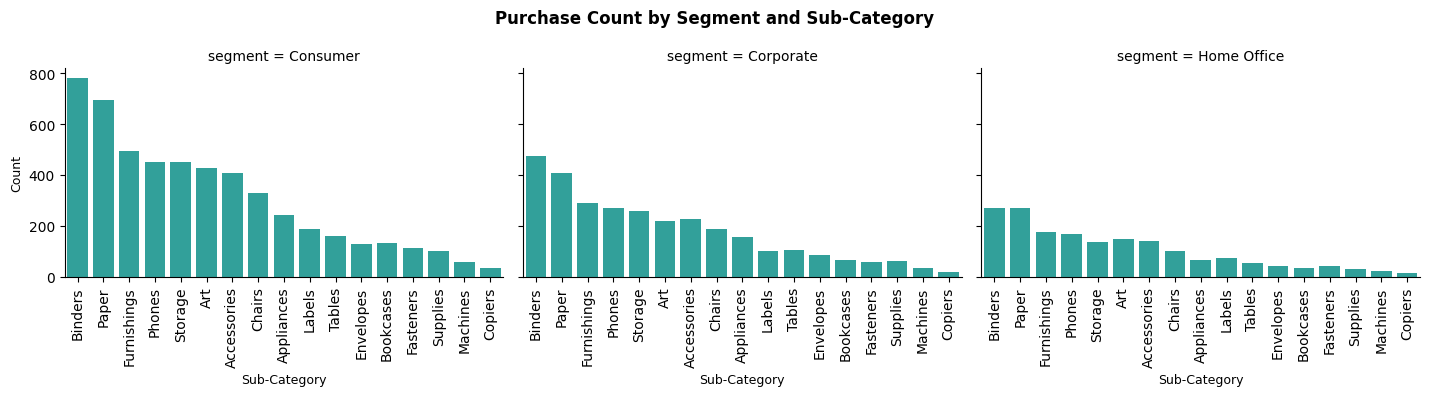

In [374]:
order = (df['sub_category'].value_counts().index)
g = sns.FacetGrid(df, col='segment', height=4, aspect=1.2)
g.map(sns.countplot, 'sub_category', order=order, color= 'LightSeaGreen')
g.set_xticklabels(rotation=90)
g.set_xlabels('Sub-Category', size=9)
g.set_ylabels('Count', size=9)
plt.suptitle('Purchase Count by Segment and Sub-Category', weight='bold')
plt.tight_layout()


### **BUSINESS INSIGHTS FROM CATBOOSTREGRESSOR**

Given the business's need to reach more customers, an approach that **increases product consumption** and **sales volume** while maintaining positive profitability is required.

To support this objective, CatBoost regression is employed to estimate the influence of each feature on the target variable ***sales***, followed by further analysis to derive strategic recommendations and enable data-driven decision-making.

#### **Data Preprocessing**

##### **Handling Outliers**

In [375]:
def clip(s, lower_q=None, upper_q=None):
    s = s.copy()
    if lower_q is not None:
        lower = s.quantile(lower_q)
    else:
        lower = None
        
    if upper_q is not None:
        upper = s.quantile(upper_q)
    else:
        upper = None
        
    return s.clip(lower=lower, upper=upper)


In [376]:
df["sales_clipped"] = clip(df["sales"], 0, 0.995)
df["profit_clipped"] = clip(df["profit"], 0.05, 0.995)

In [377]:
def clip_stats(s, lower_q=None, upper_q=None):
    lower = s.quantile(lower_q) if lower_q is not None else None
    upper = s.quantile(upper_q) if upper_q is not None else None

    n_low = (s < lower).sum() if lower is not None else 0
    n_high = (s > upper).sum() if upper is not None else 0

    return {
        "lower_bound": lower,
        "upper_bound": upper,
        "n_clipped_low": n_low,
        "n_clipped_high": n_high,
        "n_clipped_total": n_low + n_high,
        "pct_clipped (%)": ((n_low + n_high) / len(s)) * 100
    }


In [378]:
sales_stats = clip_stats(df["sales"], 0, 0.995)
profit_stats = clip_stats(df["profit"], 0.05, 0.995)


clip_summary = pd.DataFrame.from_dict(
    {
        "sales": sales_stats,
        "profit": profit_stats,
    },
    orient="index"
)

clip_summary

,lower_bound,upper_bound,n_clipped_low,n_clipped_high,n_clipped_total,pct_clipped (%)
sales,0.44400,3394.0587,0,50,50,0.500300
profit,-53.03092,843.1706,500,49,549,5.493296


#### **CatBoostRegressor Training**

##### **Datasets Splitting** 

In [379]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

target = 'sales_clipped'

cat_features = [
    'customer_id',
    'product_id',
    'sub_category',
    'category',
    'segment',
    'region',
    'ship_mode'
]

num_features = [
    'discount',
    'ship_days'
]

features = cat_features + num_features

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
cat_feature_indices = [
    X.columns.get_loc(col) for col in cat_features
]


##### **Hyperparameters Tuning**

In [380]:
import optuna

In [381]:
def objective(trial):

    params = {
        'iterations': trial.suggest_int('iterations', 300, 800),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 3),
        'random_strength': trial.suggest_float('random_strength', 0, 3),
        'loss_function': 'RMSE',
        'eval_metric': 'R2',
        'random_seed': 81,
        'verbose': 0
    }

    model = CatBoostRegressor(**params)

    model.fit(
        X_train, y_train,
        cat_features=cat_feature_indices,
        eval_set=(X_test, y_test),
        early_stopping_rounds=50
    )

    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)

    print(
        f"Trial {trial.number} | R2: {r2:.4f} | "
        f"depth={params['depth']} | "
        f"lr={params['learning_rate']:.4f} | "
        f"iter={params['iterations']}"
    )

    return r2


In [382]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)


[I 2026-01-27 22:18:47,600] A new study created in memory with name: no-name-90640c5b-1b95-4765-9d47-5b3762b7627f


[I 2026-01-27 22:19:04,485] Trial 0 finished with value: 0.3507539706551085 and parameters: {'iterations': 509, 'depth': 7, 'learning_rate': 0.043748697014635206, 'l2_leaf_reg': 8, 'bagging_temperature': 1.608983396273066, 'random_strength': 0.891345868109537}. Best is trial 0 with value: 0.3507539706551085.


Trial 0 | R2: 0.3508 | depth=7 | lr=0.0437 | iter=509


[I 2026-01-27 22:19:14,786] Trial 1 finished with value: 0.3480797369487343 and parameters: {'iterations': 369, 'depth': 6, 'learning_rate': 0.03065853298835099, 'l2_leaf_reg': 1, 'bagging_temperature': 2.244465857550476, 'random_strength': 1.23845765754239}. Best is trial 0 with value: 0.3507539706551085.


Trial 1 | R2: 0.3481 | depth=6 | lr=0.0307 | iter=369


[I 2026-01-27 22:19:53,322] Trial 2 finished with value: 0.3385749815338489 and parameters: {'iterations': 766, 'depth': 10, 'learning_rate': 0.0209762236732923, 'l2_leaf_reg': 10, 'bagging_temperature': 2.0225004122933137, 'random_strength': 0.10304619924544056}. Best is trial 0 with value: 0.3507539706551085.


Trial 2 | R2: 0.3386 | depth=10 | lr=0.0210 | iter=766


[I 2026-01-27 22:20:18,313] Trial 3 finished with value: 0.3412599044997132 and parameters: {'iterations': 516, 'depth': 10, 'learning_rate': 0.013426763376096, 'l2_leaf_reg': 3, 'bagging_temperature': 2.570567898644958, 'random_strength': 1.9108450644575532}. Best is trial 0 with value: 0.3507539706551085.


Trial 3 | R2: 0.3413 | depth=10 | lr=0.0134 | iter=516


[I 2026-01-27 22:20:24,890] Trial 4 finished with value: 0.3261806996379565 and parameters: {'iterations': 361, 'depth': 4, 'learning_rate': 0.010118823382797487, 'l2_leaf_reg': 9, 'bagging_temperature': 1.1109109569906637, 'random_strength': 1.1944033070415174}. Best is trial 0 with value: 0.3507539706551085.


Trial 4 | R2: 0.3262 | depth=4 | lr=0.0101 | iter=361


[I 2026-01-27 22:20:44,175] Trial 5 finished with value: 0.344069970992535 and parameters: {'iterations': 676, 'depth': 6, 'learning_rate': 0.02512831571116748, 'l2_leaf_reg': 8, 'bagging_temperature': 0.9211366368425565, 'random_strength': 2.483531375751591}. Best is trial 0 with value: 0.3507539706551085.


Trial 5 | R2: 0.3441 | depth=6 | lr=0.0251 | iter=676


[I 2026-01-27 22:21:01,609] Trial 6 finished with value: 0.34807904236074916 and parameters: {'iterations': 641, 'depth': 8, 'learning_rate': 0.025634561016206796, 'l2_leaf_reg': 3, 'bagging_temperature': 0.9992368370740413, 'random_strength': 0.7283471613828714}. Best is trial 0 with value: 0.3507539706551085.


Trial 6 | R2: 0.3481 | depth=8 | lr=0.0256 | iter=641


[I 2026-01-27 22:21:11,126] Trial 7 finished with value: 0.3496712488702344 and parameters: {'iterations': 314, 'depth': 6, 'learning_rate': 0.0652190566131745, 'l2_leaf_reg': 8, 'bagging_temperature': 2.93028768004375, 'random_strength': 0.4786692860656687}. Best is trial 0 with value: 0.3507539706551085.


Trial 7 | R2: 0.3497 | depth=6 | lr=0.0652 | iter=314


[I 2026-01-27 22:21:32,895] Trial 8 finished with value: 0.3515776344402537 and parameters: {'iterations': 627, 'depth': 7, 'learning_rate': 0.020078846692965568, 'l2_leaf_reg': 3, 'bagging_temperature': 2.7660301354445345, 'random_strength': 1.406065932759161}. Best is trial 8 with value: 0.3515776344402537.


Trial 8 | R2: 0.3516 | depth=7 | lr=0.0201 | iter=627


[I 2026-01-27 22:21:50,030] Trial 9 finished with value: 0.34772968884728483 and parameters: {'iterations': 594, 'depth': 6, 'learning_rate': 0.022733475638344054, 'l2_leaf_reg': 2, 'bagging_temperature': 1.7537285656739396, 'random_strength': 2.828961771557535}. Best is trial 8 with value: 0.3515776344402537.


Trial 9 | R2: 0.3477 | depth=6 | lr=0.0227 | iter=594


In [383]:
best_params = study.best_params
print(best_params)


{'iterations': 627, 'depth': 7, 'learning_rate': 0.020078846692965568, 'l2_leaf_reg': 3, 'bagging_temperature': 2.7660301354445345, 'random_strength': 1.406065932759161}


It is observed that clipping boundaries can have a noticeable impact on model performance. In particular, as more extreme values are capped at the limits, the R-squared is more likely to improve. However, **excessively clipping** extreme values may **dilute meaningful business signals**. Since the primary objective of using CatBoostRegressor is to estimate the influence of each feature on the target variable, clipping is intentionally **kept at a low level** to preserve as much informative signal as possible, even **at the expense of marginal performance gains**.

##### **Training and Testing**

In [384]:
best_model = CatBoostRegressor(
    **best_params,
    loss_function='RMSE',
    random_seed=81,
    verbose=0
)

best_model.fit(
    X_train, y_train,
    cat_features=cat_feature_indices
)


In [385]:
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)


In [386]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

metrics = {
    'train_r2': r2_score(y_train, y_pred_train),
    'test_r2':  r2_score(y_test, y_pred_test),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'test_rmse':  np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'train_mae': mean_absolute_error(y_train, y_pred_train),
    'test_mae':  mean_absolute_error(y_test, y_pred_test)
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


train_r2: 0.4838
test_r2: 0.3516
train_rmse: 304.0727
test_rmse: 388.4254
train_mae: 136.0991
test_mae: 156.7029


#### **Feature Importance**

In [387]:
best_model.get_feature_importance(prettified=True)


,Feature Id,Importances
0,sub_category,41.612812
1,product_id,17.515339
2,discount,10.942169
3,category,8.986696
4,customer_id,5.693358
5,region,4.418878
6,ship_mode,4.310828
7,segment,4.193351
8,ship_days,2.326567


The result illustrates that features relating to product-related features (such as **sub_category** and product_id) and **discount** contribute greatly to the sales prediction. Accordingly, **discount strategies** for **specific sub_categories** may help stimulate product consumption and increase overall sales.

#### **Sub-Category and Discount Rate Analysis**

In [388]:
df_ = df.copy()
bins = [0, 0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.40, 1.0]
labels = [
    "0%", "1–5%", "5–10%", "10–15%", "15–20%",
    "20–25%", "25–30%", "30–40%", "40%+"
]

df_["discount_bin"] = pd.cut(
    df["discount"],
    bins=bins,
    labels=labels,
    include_lowest=True
)
df_['profit'] = df['profit']
df_['sales'] = df['sales']


In [389]:
interaction_suca = (
    df_
    .groupby(["sub_category", "discount_bin"])
    .agg(
        sum_profit=("profit", "sum"),
        loss_rate=("profit", lambda x: (x < 0).mean() * 100),
        n_orders=("profit", "count"),
        quantity=("quantity", "sum")
    )
    .reset_index()
)

interaction_suca["profit_per_order"] = interaction_suca["sum_profit"] / interaction_suca["n_orders"]

interaction_suca.sort_values(
    ["sub_category", "profit_per_order"],
    ascending=[True, False]
)

C:\Users\Asus\AppData\Local\Temp\ipykernel_22484\641247274.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,sub_category,discount_bin,sum_profit,loss_rate,n_orders,quantity,profit_per_order
0,Accessories,0%,35289.2539,0.000000,471,1835,74.924106
4,Accessories,15–20%,6647.3818,29.934211,304,1141,21.866388
1,Accessories,1–5%,0.0000,NaN,0,0,NaN
2,Accessories,5–10%,0.0000,NaN,0,0,NaN
3,Accessories,10–15%,0.0000,NaN,0,0,NaN
...,...,...,...,...,...,...,...
152,Tables,40%+,-11108.4984,100.000000,47,178,-236.351030
145,Tables,1–5%,0.0000,NaN,0,0,NaN
146,Tables,5–10%,0.0000,NaN,0,0,NaN
147,Tables,10–15%,0.0000,NaN,0,0,NaN


In [397]:
baseline_0 = (
    interaction_suca
    [interaction_suca["discount_bin"] == "0%"]
    [["sub_category", "quantity"]]
    .rename(columns={"quantity": "q_0"})
)

interaction_ = interaction_suca.merge(
    baseline_0,
    on="sub_category",
    how="left"
)

best_rate = interaction_[
    interaction_["quantity"] > interaction_["q_0"]
]
best_rate['pct'] = ((best_rate['quantity'] - best_rate['q_0'])/best_rate['q_0'])*100
best_rate.loc[best_rate['sum_profit'] >=0, :]

C:\Users\Asus\AppData\Local\Temp\ipykernel_22484\792031682.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sub_category,discount_bin,sum_profit,loss_rate,n_orders,quantity,profit_per_order,q_0,pct
31,Binders,15–20%,29417.8090,0.000000,573,2227,51.339981,1291,72.501936
49,Chairs,15–20%,4283.1750,33.200000,250,889,17.132700,540,64.629630
58,Copiers,15–20%,17878.7148,0.000000,37,119,483.208508,82,45.121951
121,Phones,15–20%,16536.3067,8.315565,469,1773,35.258650,1102,60.889292



Since profitability must be maintained at a positive level, only sub-categories that demonstrate an **increase in quantity** at specific discount rates while maintaing a **positive total of profit** are selected.


At a discount rate of 15-20%, Binders, Chairs, Copiers and Phones purchased quanity increase 73%, 65%, 45% and 61%, respectively


In [391]:
from scipy.stats import mannwhitneyu

def test_discount_quantity(df, subcat, low=0.15, high=0.20):
    df_sub = df[df["sub_category"] == subcat]

    q_0 = df_sub[df_sub["discount"] == 0]["quantity"]
    q_d = df_sub[
        (df_sub["discount"] > low) &
        (df_sub["discount"] <= high)
    ]["quantity"]

    if len(q_0) < 30 or len(q_d) < 30:
        return None  # sample quá nhỏ, không test

    stat, p_value = mannwhitneyu(
        q_d,
        q_0,
        alternative="greater"
    )

    return {
        "sub_category": subcat,
        "n_0": len(q_0),
        "n_d": len(q_d),
        "p_value": p_value
    }


**Hypotheis Testing**

**Null hypothesis (H0):**
There is ***no statistically significant difference*** in product consumption between  discounted and non-discounted orders within each sub-category

**Alternative hypothesis (H1):**
There is ***a statistically significant difference*** in product consumption between  discounted and non-discounted orders within each sub-category

In [392]:
results = []

for subcat in ["Binders", "Chairs", "Copiers", "Phones"]:
    r = test_discount_quantity(df, subcat)
    if r:
        results.append(r)

pd.DataFrame(results)


,sub_category,n_0,n_d,p_value
0,Binders,337,573,0.454899
1,Chairs,133,250,0.930385
2,Phones,311,469,0.032375


Based on the Mann–Whitney U test results, a statistically significant difference between discounted and non-discounted transactions is observed only for the Phones sub-category (p < 0.05). This suggests that discounting rate at **15-20%** has a **meaningful impact** on sales for **Phones**.

In contrast, discount strategies do not considerably affect sales performance for Binders and Chairs.

In [394]:
# tỷ lệ order mua trên >= 4 phones có tăng lên khi áp dụng giảm giá không
def large_order_rate(q, threshold=4):
    return (q >= threshold).mean() * 100

df_sub = df[df["sub_category"] == "Phones"]

rate_0 = large_order_rate(df_sub[df_sub["discount"] == 0]["quantity"])
rate_d = large_order_rate(
    df_sub[(df_sub["discount"] > 0.15) & (df_sub["discount"] <= 0.20)]["quantity"]
)

rate_0, rate_d


(np.float64(37.29903536977492), np.float64(43.71002132196162))

Additionally, a 15–20% discount also leads to an approximate **17% relative increase** in the share of **large orders** involving more than four phones.

#### **Recommendations**

A 15–20% discount rate appears to be a promising lever to increase product consumption and sales volume, with varying levels of statistical support across sub-categories.

For **Chairs and Binders**, applying a **15–20% discount** is associated with a noticeable increase in purchased quantity; however, this uplift is **not statistically significant**.

In contrast, for **Phones**, the discount effect is **statistically significant**. A **15–20% discount** leads to an approximate **61% increase** in average **quantity purchased** and a **17% increase** in the share of **large orders**.

Therefore, it is recommended to prioritize the **15–20% discount strategy for Phones**, while adopting a cautious, **experimental approach** for **Chairs and Binders** to validate its effectiveness without risking profitability.